In [1]:
import numpy as np
import pandas as pd
import sys, os, time
main_folder = './../'
if main_folder not in sys.path:
    sys.path.append(main_folder)
from evolution import DifferentialEvolution
from glob       import glob
from tqdm       import tqdm

import dirs
from utils      import get_solution, ProgressBar, write_log
import matplotlib.pyplot as plt 

progbar = ProgressBar(elapsed_time=True)

### Parameters

In [2]:
# Competition Parameters
funcId      = 1
dim         = 10
numRuns     = 2
targetError = 1e-8

# Algorithm Parameters
pop_size = 300
percMaxEvals = 1
maxEvals = 'auto'
maxGenerations = None
fitness_clusters = None
crossover = 'binonial'
mutation = 'best'
n_diff = 1
lambda_mutation = .5
opposition = False
input_data_filepath = './../input_data'
active = False

In [3]:
# Parameters
algorithm = "de"
mutation = "best"
n_diff = 1
crossover = "bin"
funcId = 1
dim = 30
numRuns = 51
pop_size = 300
percMaxEvals = 0.4
lambda_mutation = 0.5
opposition = False
fitness_clusters = None
input_data_filepath = "./input_data"
active = True


In [4]:
maxEvals = maxEvals if percMaxEvals is None else percMaxEvals*10000*dim
run_tag = '[' + '_'.join([str(funcId), 
                          str(dim), 
                          str(numRuns),
                          str(pop_size), 
                          str(percMaxEvals),                                                     
                          '{}'.format(lambda_mutation), 
                          str(opposition),
                          str(fitness_clusters)
                         ])  + ']'
run_tag

'[1_30_51_300_0.4_0.5_False_None]'

In [5]:
alg = DifferentialEvolution(dim=dim, func_id=funcId, pop_size=pop_size, crossover=crossover, 
        opposition=opposition, mutation=mutation, lambda_mutation=.5, fitness_clusters=fitness_clusters)

output_filepath = os.path.join(dirs.results, str(alg))
if not os.path.exists(output_filepath):
    os.makedirs(output_filepath)
output_filepath = output_filepath + '/' + run_tag

print ('Writing log at ', output_filepath + 'log.tsv')
write_log(filepath=output_filepath + 'log.tsv', 
          mode="w+", 
          text='[{}]\trun\telapsedTime\tsuccessRate\n'.format(time.strftime("%Y-%m-%d %H:%M:%S", time.gmtime())))  

Writing log at 

./results/DE/best/1/bin/[1_30_51_300_0.4_0.5_False_None]log.tsv

In [6]:
hist = pd.DataFrame()
arr_runs = range(numRuns)
solution = get_solution(funcId, dim, input_data_filepath=input_data_filepath)
successRate = 0
for idx_run in arr_runs:
    progbar.update_progress(idx_run/float(len(arr_runs)))
    
    # Differential Evolution
    alg = DifferentialEvolution(dim=dim, func_id=funcId, pop_size=pop_size, crossover=crossover, 
        opposition=opposition, mutation=mutation, lambda_mutation=.5, fitness_clusters=fitness_clusters)
    
    errorHist, fitnessHist = alg.optimize(target=solution, max_f_evals=maxEvals, target_error=targetError, verbose=True)        
    bestError = errorHist.iloc[-1,:].min()
    errorHist["run"] = np.ones(errorHist.shape[0], dtype=int)*idx_run
    hist = pd.concat([hist, errorHist], ignore_index=False)    
    if bestError <= targetError:
        print ("Target error achieved with error {}".format(bestError))
        successRate += 1
    
    write_log(filepath=output_filepath + 'log.tsv', 
              text='[{}]\t{}/{}\t{}\t{}\n'.format(time.strftime("%Y-%m-%d %H:%M:%S", time.gmtime()), 
                                              idx_run+1,
                                              len(arr_runs),
                                              progbar.get_elapsed_time(),
                                              successRate)
             )
    
hist.index.name = 'generation'
hist.to_csv(output_filepath + 'hist.tsv', sep='\t')
progbar.update_progress(1)

[0:00:00][----------] 0.00% 

Optimization ended due to max fitness evals (max = 120000.0, curr = 119700)


#Generations:	397

#FitnessEvals:	119700

Mean Fitness:	62617463.5612

Best Fitness:	19741378.7426
Solution:	100.0000
Diff:		19741278.7426

[0:16:14][----------] 1.96% 

Optimization ended due to max fitness evals (max = 120000.0, curr = 119700)


#Generations:	397

#FitnessEvals:	119700

Mean Fitness:	96418616.4106

Best Fitness:	38683483.4594
Solution:	100.0000
Diff:		38683383.4594

[0:31:11][----------] 3.92% 

Optimization ended due to max fitness evals (max = 120000.0, curr = 119700)


#Generations:	397

#FitnessEvals:	119700

Mean Fitness:	61601391.6296

Best Fitness:	19510139.2979
Solution:	100.0000
Diff:		19510039.2979

[0:45:08][#---------] 5.88% 

Optimization ended due to max fitness evals (max = 120000.0, curr = 119700)


#Generations:	397

#FitnessEvals:	119700

Mean Fitness:	84620613.7818

Best Fitness:	37488643.9556
Solution:	100.0000
Diff:		37488543.9556

[0:59:04][#---------] 7.84% 

Optimization ended due to max fitness evals (max = 120000.0, curr = 119700)


#Generations:	397

#FitnessEvals:	119700

Mean Fitness:	45399877.1982

Best Fitness:	16213126.3660
Solution:	100.0000
Diff:		16213026.3660

[1:12:39][#---------] 9.80% 

Optimization ended due to max fitness evals (max = 120000.0, curr = 119700)


#Generations:	397

#FitnessEvals:	119700

Mean Fitness:	73763133.4076

Best Fitness:	38173328.9204
Solution:	100.0000
Diff:		38173228.9204

[1:25:59][#---------] 11.76% 

Optimization ended due to max fitness evals (max = 120000.0, curr = 119700)


#Generations:	397

#FitnessEvals:	119700

Mean Fitness:	49850436.3521

Best Fitness:	20808243.6240
Solution:	100.0000
Diff:		20808143.6240

[1:39:32][#---------] 13.73% 

Optimization ended due to max fitness evals (max = 120000.0, curr = 119700)


#Generations:	397

#FitnessEvals:	119700

Mean Fitness:	53037892.5188

Best Fitness:	21707974.6298
Solution:	100.0000
Diff:		21707874.6298

[1:52:28][##--------] 15.69% 

Optimization ended due to max fitness evals (max = 120000.0, curr = 119700)


#Generations:	397

#FitnessEvals:	119700

Mean Fitness:	78669271.0070

Best Fitness:	27222142.4719
Solution:	100.0000
Diff:		27222042.4719

[2:05:39][##--------] 17.65% 

Optimization ended due to max fitness evals (max = 120000.0, curr = 119700)


#Generations:	397

#FitnessEvals:	119700

Mean Fitness:	75949758.4154

Best Fitness:	31796759.0352
Solution:	100.0000
Diff:		31796659.0352

[2:18:14][##--------] 19.61% 

Optimization ended due to max fitness evals (max = 120000.0, curr = 119700)


#Generations:	397

#FitnessEvals:	119700

Mean Fitness:	83092053.2992

Best Fitness:	25691041.6482
Solution:	100.0000
Diff:		25690941.6482

[2:31:01][##--------] 21.57% 

Optimization ended due to max fitness evals (max = 120000.0, curr = 119700)


#Generations:	397

#FitnessEvals:	119700

Mean Fitness:	34294716.0124

Best Fitness:	8423084.6296
Solution:	100.0000
Diff:		8422984.6296

[2:42:19][##--------] 23.53% 

Optimization ended due to max fitness evals (max = 120000.0, curr = 119700)


#Generations:	397

#FitnessEvals:	119700

Mean Fitness:	72113967.9714

Best Fitness:	24942837.9234
Solution:	100.0000
Diff:		24942737.9234

[2:53:45][###-------] 25.49% 

Optimization ended due to max fitness evals (max = 120000.0, curr = 119700)


#Generations:	397

#FitnessEvals:	119700

Mean Fitness:	94923606.7279

Best Fitness:	41404891.7234
Solution:	100.0000
Diff:		41404791.7234

[3:04:54][###-------] 27.45% 

Optimization ended due to max fitness evals (max = 120000.0, curr = 119700)


#Generations:	397

#FitnessEvals:	119700

Mean Fitness:	86295408.3675

Best Fitness:	29209297.8729
Solution:	100.0000
Diff:		29209197.8729

[3:16:03][###-------] 29.41% 

Optimization ended due to max fitness evals (max = 120000.0, curr = 119700)


#Generations:	397

#FitnessEvals:	119700

Mean Fitness:	57392300.0328

Best Fitness:	25789906.1411
Solution:	100.0000
Diff:		25789806.1411

[3:26:36][###-------] 31.37% 

Optimization ended due to max fitness evals (max = 120000.0, curr = 119700)


#Generations:	397

#FitnessEvals:	119700

Mean Fitness:	56642920.8360

Best Fitness:	19568982.0105
Solution:	100.0000
Diff:		19568882.0105

[3:37:03][###-------] 33.33% 

Optimization ended due to max fitness evals (max = 120000.0, curr = 119700)


#Generations:	397

#FitnessEvals:	119700

Mean Fitness:	50815446.5405

Best Fitness:	20332511.1272
Solution:	100.0000
Diff:		20332411.1272

[3:47:45][####------] 35.29% 

Optimization ended due to max fitness evals (max = 120000.0, curr = 119700)


#Generations:	397

#FitnessEvals:	119700

Mean Fitness:	47843074.4159

Best Fitness:	17046891.1141
Solution:	100.0000
Diff:		17046791.1141

[3:58:02][####------] 37.25% 

Optimization ended due to max fitness evals (max = 120000.0, curr = 119700)


#Generations:	397

#FitnessEvals:	119700

Mean Fitness:	33799469.4353

Best Fitness:	13490013.2699
Solution:	100.0000
Diff:		13489913.2699

[4:08:17][####------] 39.22% 

Optimization ended due to max fitness evals (max = 120000.0, curr = 119700)


#Generations:	397

#FitnessEvals:	119700

Mean Fitness:	53299570.8237

Best Fitness:	28744374.0583
Solution:	100.0000
Diff:		28744274.0583

[4:18:20][####------] 41.18% 

Optimization ended due to max fitness evals (max = 120000.0, curr = 119700)


#Generations:	397

#FitnessEvals:	119700

Mean Fitness:	47274617.7466

Best Fitness:	20215615.4132
Solution:	100.0000
Diff:		20215515.4132

[4:28:48][####------] 43.14% 

Optimization ended due to max fitness evals (max = 120000.0, curr = 119700)


#Generations:	397

#FitnessEvals:	119700

Mean Fitness:	57563829.8852

Best Fitness:	23161582.0924
Solution:	100.0000
Diff:		23161482.0924

[4:39:21][#####-----] 45.10% 

Optimization ended due to max fitness evals (max = 120000.0, curr = 119700)


#Generations:	397

#FitnessEvals:	119700

Mean Fitness:	56493644.3259

Best Fitness:	24411347.7284
Solution:	100.0000
Diff:		24411247.7284

[4:49:27][#####-----] 47.06% 

Optimization ended due to max fitness evals (max = 120000.0, curr = 119700)


#Generations:	397

#FitnessEvals:	119700

Mean Fitness:	59918543.8030

Best Fitness:	20330823.7700
Solution:	100.0000
Diff:		20330723.7700

[4:59:01][#####-----] 49.02% 

Optimization ended due to max fitness evals (max = 120000.0, curr = 119700)


#Generations:	397

#FitnessEvals:	119700

Mean Fitness:	52083540.5578

Best Fitness:	18041627.5054
Solution:	100.0000
Diff:		18041527.5054

[5:08:07][#####-----] 50.98% 

Optimization ended due to max fitness evals (max = 120000.0, curr = 119700)


#Generations:	397

#FitnessEvals:	119700

Mean Fitness:	47516762.2128

Best Fitness:	14435287.2301
Solution:	100.0000
Diff:		14435187.2301

[5:16:54][#####-----] 52.94% 

Optimization ended due to max fitness evals (max = 120000.0, curr = 119700)


#Generations:	397

#FitnessEvals:	119700

Mean Fitness:	101268165.4271

Best Fitness:	32081458.0893
Solution:	100.0000
Diff:		32081358.0893

[5:25:02][#####-----] 54.90% 

Optimization ended due to max fitness evals (max = 120000.0, curr = 119700)


#Generations:	397

#FitnessEvals:	119700

Mean Fitness:	58525731.1609

Best Fitness:	31161154.7387
Solution:	100.0000
Diff:		31161054.7387

[5:32:50][######----] 56.86% 

Optimization ended due to max fitness evals (max = 120000.0, curr = 119700)


#Generations:	397

#FitnessEvals:	119700

Mean Fitness:	76059523.7405

Best Fitness:	32050715.0340
Solution:	100.0000
Diff:		32050615.0340

[5:40:28][######----] 58.82% 

Optimization ended due to max fitness evals (max = 120000.0, curr = 119700)


#Generations:	397

#FitnessEvals:	119700

Mean Fitness:	77853467.1084

Best Fitness:	36690963.3177
Solution:	100.0000
Diff:		36690863.3177

[5:48:08][######----] 60.78% 

Optimization ended due to max fitness evals (max = 120000.0, curr = 119700)


#Generations:	397

#FitnessEvals:	119700

Mean Fitness:	56267168.5181

Best Fitness:	24425474.4014
Solution:	100.0000
Diff:		24425374.4014

[5:55:38][######----] 62.75% 

Optimization ended due to max fitness evals (max = 120000.0, curr = 119700)


#Generations:	397

#FitnessEvals:	119700

Mean Fitness:	62187501.7383

Best Fitness:	23523288.9020
Solution:	100.0000
Diff:		23523188.9020

[6:02:39][######----] 64.71% 

Optimization ended due to max fitness evals (max = 120000.0, curr = 119700)


#Generations:	397

#FitnessEvals:	119700

Mean Fitness:	39460316.6839

Best Fitness:	10445252.6071
Solution:	100.0000
Diff:		10445152.6071

[6:09:38][#######---] 66.67% 

Optimization ended due to max fitness evals (max = 120000.0, curr = 119700)


#Generations:	397

#FitnessEvals:	119700

Mean Fitness:	62573489.4393

Best Fitness:	21943758.2187
Solution:	100.0000
Diff:		21943658.2187

[6:16:38][#######---] 68.63% 

Optimization ended due to max fitness evals (max = 120000.0, curr = 119700)


#Generations:	397

#FitnessEvals:	119700

Mean Fitness:	71966834.7933

Best Fitness:	31316575.7624
Solution:	100.0000
Diff:		31316475.7624

[6:23:38][#######---] 70.59% 

Optimization ended due to max fitness evals (max = 120000.0, curr = 119700)


#Generations:	397

#FitnessEvals:	119700

Mean Fitness:	62825144.4435

Best Fitness:	20120742.6893
Solution:	100.0000
Diff:		20120642.6893

[6:30:03][#######---] 72.55% 

Optimization ended due to max fitness evals (max = 120000.0, curr = 119700)


#Generations:	397

#FitnessEvals:	119700

Mean Fitness:	65333844.9462

Best Fitness:	17279536.2273
Solution:	100.0000
Diff:		17279436.2273

[6:36:19][#######---] 74.51% 

Optimization ended due to max fitness evals (max = 120000.0, curr = 119700)


#Generations:	397

#FitnessEvals:	119700

Mean Fitness:	40330127.8659

Best Fitness:	19171541.0131
Solution:	100.0000
Diff:		19171441.0131

[6:41:57][########--] 76.47% 

Optimization ended due to max fitness evals (max = 120000.0, curr = 119700)


#Generations:	397

#FitnessEvals:	119700

Mean Fitness:	57773955.0949

Best Fitness:	24915658.8570
Solution:	100.0000
Diff:		24915558.8570

[6:47:35][########--] 78.43% 

Optimization ended due to max fitness evals (max = 120000.0, curr = 119700)


#Generations:	397

#FitnessEvals:	119700

Mean Fitness:	65215751.8728

Best Fitness:	22406805.3023
Solution:	100.0000
Diff:		22406705.3023

[6:52:54][########--] 80.39% 

Optimization ended due to max fitness evals (max = 120000.0, curr = 119700)


#Generations:	397

#FitnessEvals:	119700

Mean Fitness:	81670493.5257

Best Fitness:	31568675.7461
Solution:	100.0000
Diff:		31568575.7461

[6:57:52][########--] 82.35% 

Optimization ended due to max fitness evals (max = 120000.0, curr = 119700)


#Generations:	397

#FitnessEvals:	119700

Mean Fitness:	39245467.1583

Best Fitness:	17495236.9367
Solution:	100.0000
Diff:		17495136.9367

[7:02:51][########--] 84.31% 

Optimization ended due to max fitness evals (max = 120000.0, curr = 119700)


#Generations:	397

#FitnessEvals:	119700

Mean Fitness:	90786520.9806

Best Fitness:	36679498.7545
Solution:	100.0000
Diff:		36679398.7545

[7:07:48][#########-] 86.27% 

Optimization ended due to max fitness evals (max = 120000.0, curr = 119700)


#Generations:	397

#FitnessEvals:	119700

Mean Fitness:	50882640.0299

Best Fitness:	18276718.0970
Solution:	100.0000
Diff:		18276618.0970

[7:12:44][#########-] 88.24% 

Optimization ended due to max fitness evals (max = 120000.0, curr = 119700)


#Generations:	397

#FitnessEvals:	119700

Mean Fitness:	39957952.7322

Best Fitness:	19901394.1406
Solution:	100.0000
Diff:		19901294.1406

[7:17:41][#########-] 90.20% 

Optimization ended due to max fitness evals (max = 120000.0, curr = 119700)


#Generations:	397

#FitnessEvals:	119700

Mean Fitness:	44020443.8873

Best Fitness:	14404418.8743
Solution:	100.0000
Diff:		14404318.8743

[7:22:37][#########-] 92.16% 

Optimization ended due to max fitness evals (max = 120000.0, curr = 119700)


#Generations:	397

#FitnessEvals:	119700

Mean Fitness:	80692844.6652

Best Fitness:	20887070.3431
Solution:	100.0000
Diff:		20886970.3431

[7:27:35][#########-] 94.12% 

Optimization ended due to max fitness evals (max = 120000.0, curr = 119700)


#Generations:	397

#FitnessEvals:	119700

Mean Fitness:	74260065.3060

Best Fitness:	31076904.9571
Solution:	100.0000
Diff:		31076804.9571

[7:32:31][##########] 96.08% 

Optimization ended due to max fitness evals (max = 120000.0, curr = 119700)


#Generations:	397

#FitnessEvals:	119700

Mean Fitness:	52706295.8174

Best Fitness:	21998018.2392
Solution:	100.0000
Diff:		21997918.2392

[7:37:27][##########] 98.04% 

Optimization ended due to max fitness evals (max = 120000.0, curr = 119700)


#Generations:	397

#FitnessEvals:	119700

Mean Fitness:	52134166.5402

Best Fitness:	24935425.9659
Solution:	100.0000
Diff:		24935325.9659

[7:42:38][##########] 100.00% Done...


In [7]:
print ("Elapsed Time: ", progbar.get_elapsed_time())

Elapsed Time: 

7:42:38

In [8]:
errorHist.tail()

,0,1,2,3,4,5,6,7,8,9,...,291,292,293,294,295,296,297,298,299,run
generation,,,,,,,,,,,,,,,,,,,,,
392,4.172507e+07,5.419593e+07,7.541603e+07,4.404234e+07,5.742988e+07,4.174316e+07,4.209213e+07,5.381956e+07,5.783143e+07,4.832824e+07,...,5.217530e+07,5.167917e+07,5.580487e+07,4.406868e+07,3.677396e+07,5.787008e+07,5.405039e+07,4.061868e+07,3.134363e+07,50
393,4.172507e+07,5.419593e+07,7.541603e+07,4.404234e+07,5.742988e+07,4.174316e+07,4.209213e+07,5.381956e+07,5.783143e+07,4.832824e+07,...,5.217530e+07,5.167917e+07,5.580487e+07,4.406868e+07,3.677396e+07,3.321526e+07,5.405039e+07,4.061868e+07,3.134363e+07,50
394,4.172507e+07,5.419593e+07,7.541603e+07,4.404234e+07,5.742988e+07,4.174316e+07,4.209213e+07,5.381956e+07,5.783143e+07,4.832824e+07,...,5.217530e+07,5.167917e+07,5.580487e+07,4.406868e+07,3.677396e+07,3.321526e+07,5.405039e+07,4.061868e+07,3.134363e+07,50
395,4.172507e+07,5.419593e+07,7.541603e+07,4.404234e+07,5.742988e+07,4.174316e+07,4.209213e+07,5.381956e+07,5.783143e+07,4.832824e+07,...,5.217530e+07,5.167917e+07,5.580487e+07,4.406868e+07,3.677396e+07,3.321526e+07,5.405039e+07,4.061868e+07,3.134363e+07,50
396,4.172507e+07,5.419593e+07,7.541603e+07,4.404234e+07,5.742988e+07,4.174316e+07,4.209213e+07,5.381956e+07,5.783143e+07,4.832824e+07,...,5.217530e+07,5.167917e+07,5.580487e+07,4.406868e+07,3.677396e+07,3.321526e+07,5.405039e+07,4.061868e+07,3.134363e+07,50


In [9]:
arr_error = list()
arr_best_error = list()
for run in hist['run'].unique():
    df_run = hist[hist['run'] == run].drop(['run'], axis=1) 
    bestError = df_run.iloc[-1,:].min()    
    arr_best_error.append(bestError)    
    print ('Best error for run {}: {}'.format(run, bestError))
    arr_error.append(np.array(df_run.min(axis=1)))    
arr_error = np.array(arr_error)
# arr_error

Best error for run 0: 19741278.742644664

Best error for run 1: 38683383.459434494

Best error for run 2: 19510039.29792916

Best error for run 3: 37488543.95555569

Best error for run 4: 16213026.36600713

Best error for run 5: 38173228.92041992

Best error for run 6: 20808143.623998743

Best error for run 7: 21707874.629841797

Best error for run 8: 27222042.47193622

Best error for run 9: 31796659.035237398

Best error for run 10: 25690941.648150172

Best error for run 11: 8422984.629646283

Best error for run 12: 24942737.923402227

Best error for run 13: 41404791.72340212

Best error for run 14: 29209197.87293351

Best error for run 15: 25789806.141119424

Best error for run 16: 19568882.010510158

Best error for run 17: 20332411.127164356

Best error for run 18: 17046791.114087176

Best error for run 19: 13489913.269890025

Best error for run 20: 28744274.05830453

Best error for run 21: 20215515.4132049

Best error for run 22: 23161482.092423372

Best error for run 23: 24411247.728376627

Best error for run 24: 20330723.77002366

Best error for run 25: 18041527.50544715

Best error for run 26: 14435187.230067063

Best error for run 27: 32081358.08933397

Best error for run 28: 31161054.738688905

Best error for run 29: 32050615.033956267

Best error for run 30: 36690863.3177469

Best error for run 31: 24425374.401404798

Best error for run 32: 23523188.901973203

Best error for run 33: 10445152.607124029

Best error for run 34: 21943658.218725324

Best error for run 35: 31316475.762381993

Best error for run 36: 20120642.689312585

Best error for run 37: 17279436.2272728

Best error for run 38: 19171441.013084095

Best error for run 39: 24915558.857031435

Best error for run 40: 22406705.302300304

Best error for run 41: 31568575.746122766

Best error for run 42: 17495136.936686534

Best error for run 43: 36679398.75452104

Best error for run 44: 18276618.096952844

Best error for run 45: 19901294.140588418

Best error for run 46: 14404318.874263741

Best error for run 47: 20886970.34305597

Best error for run 48: 31076804.95710923

Best error for run 49: 21997918.239178516

Best error for run 50: 24935325.965868063

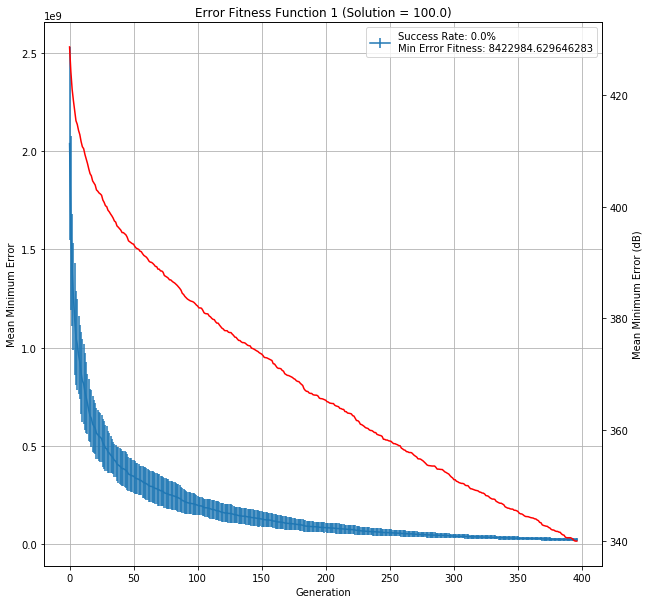

In [10]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,10))
label = 'Success Rate: {}%\nMin Error Fitness: {}'.format(100*(successRate/float(numRuns)), arr_error.min())
ax.errorbar(np.arange(alg.generations), arr_error.mean(axis=0), yerr=arr_error.std(axis=0), label=label)
ax2 = ax.twinx()
ax2.plot(np.arange(alg.generations), 20*np.log(arr_error.mean(axis=0)), label='Mean Min Error (dB)', color='red')
ax2.set_ylabel('Mean Minimum Error (dB)')

ax.grid(True)
ax.set_ylabel('Mean Minimum Error')
ax.legend()
ax.set_xlabel('Generation')
ax.set_title('Error Fitness Function {} (Solution = {})'.format(funcId, solution))
plt.savefig(output_filepath + 'mean_error_evolution.jpeg', bbox_inches = 'tight')

In [11]:
df_sumup = pd.DataFrame(columns=['algorithm', '#Fc', 'D', 'percFES'] + ['run_' + str(i) for i in np.arange(1,numRuns+1,1)] + ['mean', 'elapsed_time', 'evals'])
df_sumup.loc[df_sumup.shape[0]] = [str(alg), funcId, dim, percMaxEvals] + arr_best_error + [np.mean(arr_best_error), progbar.get_elapsed_time(), alg.fitnessEvals]
print ('Saving df_sumup to ', output_filepath + 'df_sumup.tsv')
df_sumup.to_csv(output_filepath + 'df_sumup.tsv', sep='\t')
df_sumup

Saving df_sumup to 

./results/DE/best/1/bin/[1_30_51_300_0.4_0.5_False_None]df_sumup.tsv

,algorithm,#Fc,D,percFES,run_1,run_2,run_3,run_4,run_5,run_6,...,run_45,run_46,run_47,run_48,run_49,run_50,run_51,mean,elapsed_time,evals
0,DE/best/1/bin,1,30,0.4,1.974128e+07,3.868338e+07,1.951004e+07,3.748854e+07,1.621303e+07,3.817323e+07,...,1.827662e+07,1.990129e+07,1.440432e+07,2.088697e+07,3.107680e+07,2.199792e+07,2.493533e+07,2.414385e+07,7:42:38,119700
